<a href="https://colab.research.google.com/github/bashleyduttman/Problems-solved/blob/machine-learning/brain%20turmor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:08<00:00, 21.7MB/s]
100% 149M/149M [00:08<00:00, 17.9MB/s]


In [3]:
!unzip \*zip && rm*.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/Tr-gl_0732.jpg  
  inflating: Training/glioma/

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
train_data=tf.keras.utils.image_dataset_from_directory(directory='/content/Training',image_size=(224,224))

Found 5712 files belonging to 4 classes.


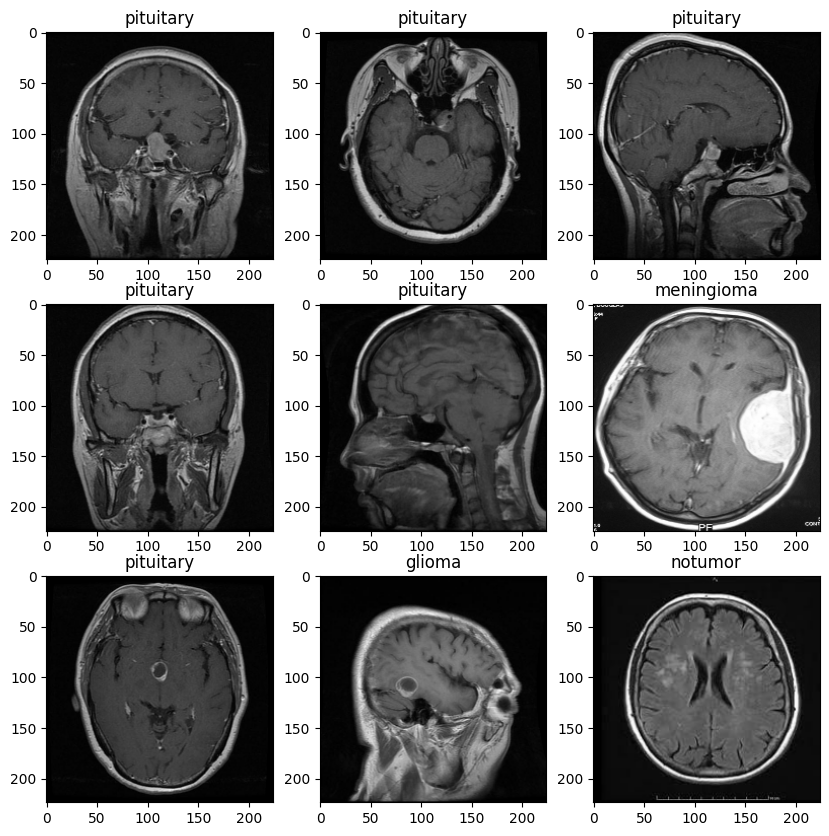

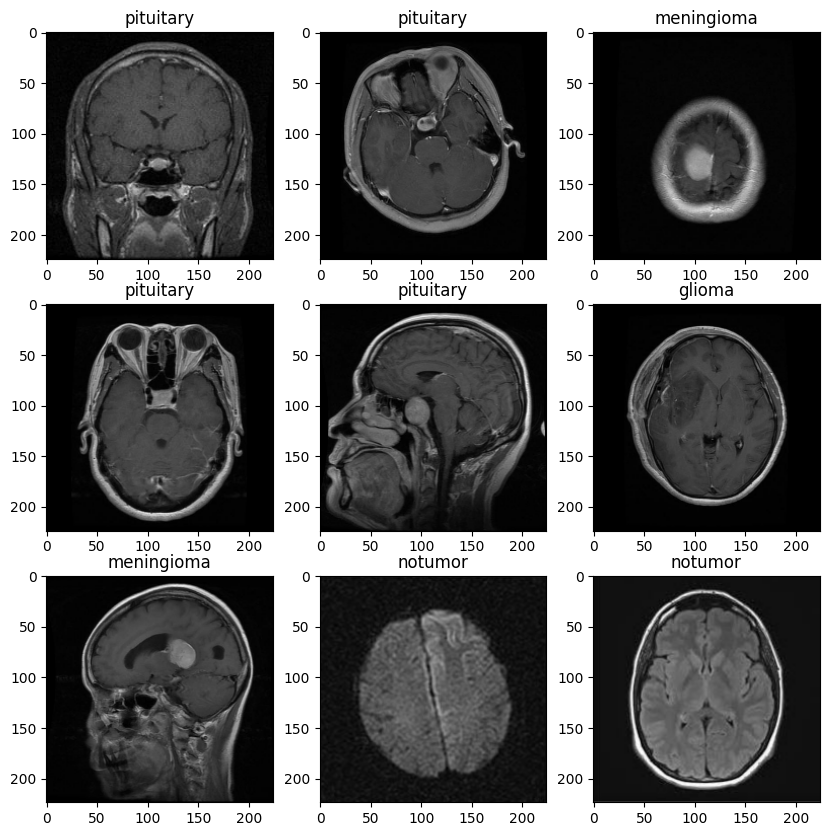

In [7]:
for image,label in train_data.take(2):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(train_data.class_names[label[i]])


In [8]:
#custom
input=tf.keras.Input(shape=(224,224,3))
x=tf.keras.layers.Rescaling(1./255)(input)
x=tf.keras.layers.Conv2D(64,3,activation='relu')(x)
x=tf.keras.layers.Conv2D(128,3,activation='relu')(x)
x=tf.keras.layers.Conv2D(64,3,activation='relu')(x)
x=tf.keras.layers.MaxPooling2D(strides=[1,1])(x)
x=tf.keras.layers.Conv2D(16,3,activation='relu')(x)
x=tf.keras.layers.MaxPooling2D(strides=[1,1])(x)
x=tf.keras.layers.Flatten()(x)
output=tf.keras.layers.Dense(4,activation='softmax')(x)

In [9]:
model=tf.keras.Model(input,output)

In [10]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history=model.fit(train_data,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 117s 460ms/step - accuracy: 0.6602 - loss: 0.9226
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 344ms/step - accuracy: 0.9089 - loss: 0.2415
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.9651 - loss: 0.1020
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.9835 - loss: 0.0490
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.9884 - loss: 0.0366
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.9898 - loss: 0.0336
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.9745 - loss: 0.0651
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 343ms/step - accuracy: 0.9874 - loss: 0.0339
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 343ms/step - accuracy: 0.9928 - loss: 0.0163
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 343ms/step - accuracy: 0.9982 - loss: 0.0064


In [12]:
#import pretrained model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [13]:
vgg=VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
resnet=ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')
inception=InceptionV3(include_top=False,input_shape=(224,224,3),weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [14]:
for layers in vgg.layers:
  layers.trainable=False
for layers in resnet.layers:
  layers.trainable=False
for layers in inception.layers:
  layers.trainable=False

In [15]:
#resnet model
x=tf.keras.layers.Flatten()(resnet.input)
output=tf.keras.layers.Dense(4,activation='softmax')(x)



In [16]:
resmodel=tf.keras.Model(resnet.input,output)
resmodel.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history2=resmodel.fit(train_data,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5001 - loss: 2264.0623
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7333 - loss: 296.8558
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7563 - loss: 351.3367
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8045 - loss: 212.9417
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8020 - loss: 245.8912
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7913 - loss: 359.3384
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8333 - loss: 223.7046
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8020 - loss: 293.0501
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8662 - loss: 159.8889
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8814 - loss: 132.7585


In [18]:
x=tf.keras.layers.Flatten()(vgg.input)
output=tf.keras.layers.Dense(4,activation='softmax')(x)
vggmodel=tf.keras.Model(vgg.input,output)
vggmodel.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
history3=resmodel.fit(train_data,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8810 - loss: 142.3318
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8762 - loss: 163.7202
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8267 - loss: 339.6970
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8778 - loss: 165.3002
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8396 - loss: 277.2151
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8806 - loss: 194.3545
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8642 - loss: 222.1891
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9298 - loss: 82.4234
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9009 - loss: 137.3168
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9049 - loss: 156.9922


In [19]:
x=tf.keras.layers.Flatten()(inception.input)
output=tf.keras.layers.Dense(4,activation='softmax')(x)
inceptionmodel=tf.keras.Model(inception.input,output)
inceptionmodel.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
history4=resmodel.fit(train_data,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8951 - loss: 183.4925
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9255 - loss: 90.3289
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9579 - loss: 48.5586
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9126 - loss: 122.9949
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9483 - loss: 55.2791
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8777 - loss: 256.8980
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9118 - loss: 135.3154
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9059 - loss: 170.5133
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9150 - loss: 156.5387
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9413 - loss: 83.8277


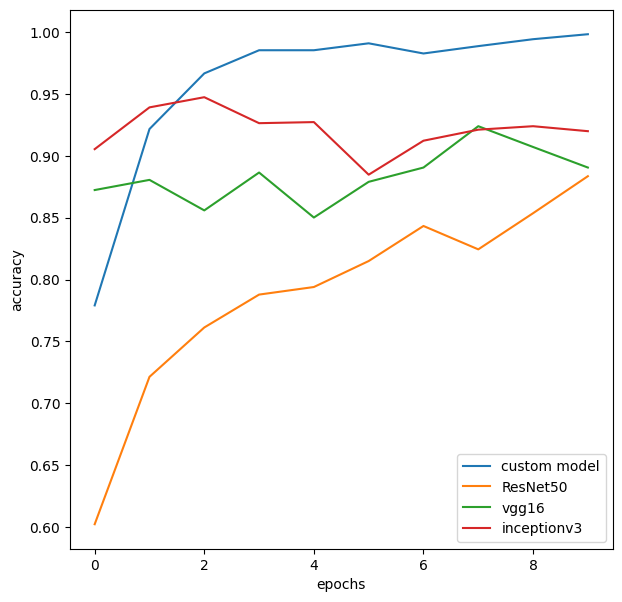

In [20]:
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["custom model","ResNet50","vgg16","inceptionv3"])

In [21]:
#evaluvating on test dataset
test_data=tf.keras.utils.image_dataset_from_directory(directory='/content/Testing',image_size=(224,224))


Found 1311 files belonging to 4 classes.


In [22]:
resnetmodel.evaluate(test_data)

NameError: name 'resnetmodel' is not defined